In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [168]:
logpath = '/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging'
fpath = os.path.join(logpath, sorted([fname for fname in os.listdir(logpath) if fname.endswith('.csv')])[-1])
print(f'{fpath=}')
df = pd.read_csv(fpath)

df['loss_diff'] = df['loss_after'] - df['loss_before']
df['score_diff'] = df['score_after'] - df['score_before']

print(f'{df.shape=}')

df.head()

fpath='/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/sr_logs_2025-03-26_22-45-17.csv'
df.shape=(147371, 13)


,timestamp,mutation_type,num_evals,attempts,loss_before,loss_after,score_before,score_after,successful_mutation,mutation_accepted,result_reason,loss_diff,score_diff
0,1.743026e+09,mutate_operator,1,1,149233.52,149233.52,0.999416,0.999416,True,True,pass,0.00,0.000000e+00
1,1.743026e+09,rotate_tree,1,1,145175.84,145170.84,0.972241,0.972208,True,True,pass,-5.00,-3.350000e-05
2,1.743026e+09,mutate_operator,1,1,145175.84,145175.84,0.972241,0.972241,True,True,pass,0.00,0.000000e+00
3,1.743026e+09,mutate_operator,1,1,145170.84,170752.44,0.972208,1.143528,True,True,pass,25581.60,1.713197e-01
4,1.743026e+09,insert_node,1,1,145170.84,145170.72,0.972208,0.972207,True,True,pass,-0.12,-8.500000e-07


In [169]:
df.result_reason.value_counts()

result_reason
pass                       94878
annealing_or_frequency     52492
failed_constraint_check        1
Name: count, dtype: int64

In [179]:
df.groupby('result_reason').score_diff.median()

result_reason
annealing_or_frequency     0.414411
failed_constraint_check    0.000000
pass                       0.000017
Name: score_diff, dtype: float64

In [171]:
df.mutation_type.value_counts()

mutation_type
mutate_operator    59263
insert_node        43461
rotate_tree        28087
do_nothing          8496
delete_node         6102
add_node            1384
mutate_constant      319
swap_operands        122
randomize            118
simplify              19
Name: count, dtype: int64

In [172]:
df.groupby('mutation_type').loss_diff.median()

mutation_type
add_node             2367.163500
delete_node          1757.890000
do_nothing              0.000000
insert_node           637.320000
mutate_constant         2.308068
mutate_operator      1124.469000
randomize          121096.105000
rotate_tree             6.290735
simplify                0.000000
swap_operands           0.000000
Name: loss_diff, dtype: float64

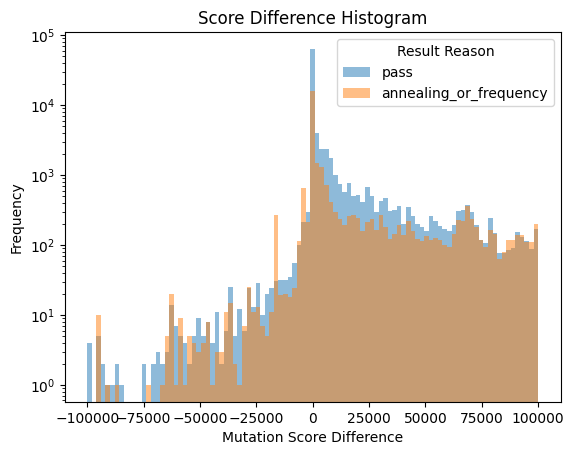

In [182]:
col = 'loss_diff'
a, n = 100000, 100
bins = np.linspace(-a, a, n)

plt.hist(df[df.result_reason == 'pass'][col], bins=bins, alpha=0.5, label='pass')
plt.hist(df[df.result_reason == 'annealing_or_frequency'][col], bins=bins, alpha=0.5, label='annealing_or_frequency')
plt.legend(title='Result Reason')
plt.yscale('log')
plt.xlabel('Mutation Score Difference')
plt.ylabel('Frequency')
plt.title('Score Difference Histogram')
plt.show()

pass

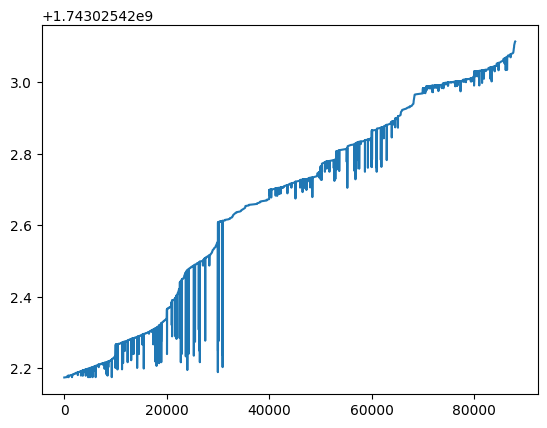

In [160]:
plt.plot(df.timestamp)

(0.0, 2.0)

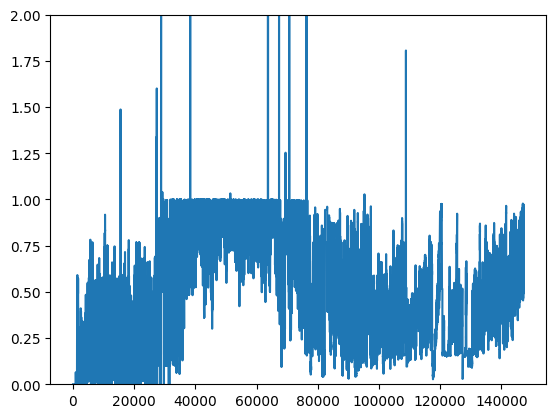

In [177]:
plt.plot(df[['timestamp', 'score_before']].sort_values(by='timestamp', ascending=False).reset_index(drop=True)['score_before'].rolling(window=10).mean())  # .sort_values(ascending=False).reset_index(drop=True)
plt.ylim(0, 2)
# plt.yscale('log')